<a href="https://colab.research.google.com/github/KK-Niraj/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



## **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [72]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from scipy.stats import norm

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/EDA Capstone Projects/Machine Learning/Unsupervised ML/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
# Check Total rows and Columns in dataset.
print(f' The shape of dataset is {(dataset.shape)} \n Total Rows are : {(dataset.shape)[0]}\n Total Columns are : {(dataset.shape)[1]}')

 The shape of dataset is (7787, 12) 
 Total Rows are : 7787
 Total Columns are : 12


In [5]:
# Checking first 5 rows in dataset
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# Checking last 5 rows in dataset
dataset.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
# Columns name
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Data processing

In [9]:
# checking for identical rows if present
dataset.duplicated().sum()

0

In [10]:
# Checking Null values
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
# Total null values
dataset.isnull().sum().sum()

3631

There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating. so we need to handle the null values

In [12]:
dataset.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [13]:
# Replacing the null values in cast column
dataset['cast'].fillna(value = 'Unknown',inplace=True)

In [14]:
# Replacing the null values in country column
dataset['country'].fillna(value = dataset['country'].mode()[0],inplace=True) 

In [15]:
# Replacing the null values in director column
dataset['director'].fillna(value = 'Unknown',inplace=True)

In [16]:
# 'date_added' and 'rating' contains an insignificant portion of the null data so we will drop them from the dataset
dataset.dropna(subset=['date_added','rating'],inplace=True)

In [17]:
# again checking is there any null values are not
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
# Adding the Month-added and year_addedcolumn in our dataset
import datetime as dt
dataset["date_added"] = pd.to_datetime(dataset['date_added'])

# Year_added
dataset['year_added'] = dataset['date_added'].dt.year

#Adding month column from 'date_added'
dataset['month_added'] = dataset['date_added'].dt.month
dataset['month_name_added'] = dataset['date_added'].dt.month_name()

# Droping the month_added columns
dataset.drop(['date_added'],axis=1,inplace=True)

In [19]:
# Lets retrieve just the first country
dataset['principal_country'] = dataset['country'].apply(lambda x: x.split(",")[0])

In [20]:
# Lets retrieve just the first actor/actress from the cast
dataset['actor/actress'] = dataset['cast'].apply(lambda x: x.split(",")[0])

In [21]:
# Creating a dictionary for rating_ages
rating_ages = {'TV-PG': 'Older Kids',
               'TV-MA': 'Adults',
               'TV-Y7-FV': 'Older Kids',
               'TV-Y7': 'Older Kids',
               'TV-14': 'Young Adults',
               'R': 'Adults',
               'TV-Y': 'Kids',
               'NR': 'Adults',
               'PG-13': 'Teens',
               'TV-G': 'Kids',
               'PG': 'Older Kids',
               'G': 'Kids',
               'UR': 'Adults',
               'NC-17': 'Adults'}
# Creating new column for age_rating
dataset['age_rating'] = dataset['rating'].apply(lambda x :rating_ages[x])

# Checking unique values for column age_rating
dataset['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

## Exploratory Data Analysis

### Analyze the type of content available on Netflix

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


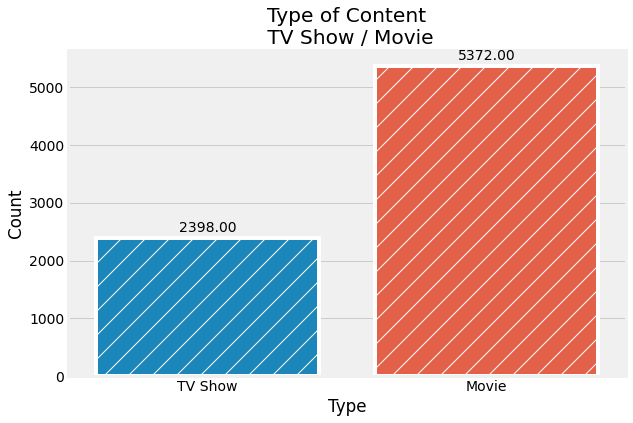

In [22]:
# Countplot to visualize the number of movies and tv_shows in type column
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.countplot('type',data = dataset, lw=4, ec='white',hatch='/')
plt.title('Type of Content\n TV Show / Movie')
plt.xlabel('Type')
plt.ylabel('Count')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=14)

Netflix has 5372 movies and 2398 TV shows, there are more number movies on Netflix than TV shows.

### Movie ratings analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


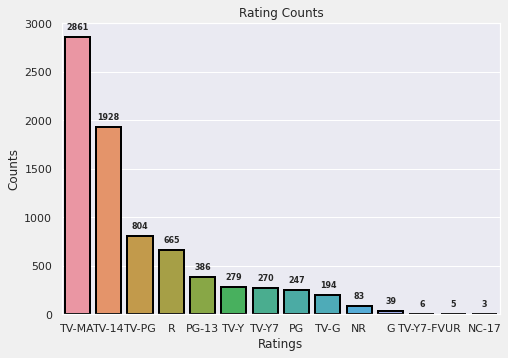

In [23]:
# Plotting the countplot for the ratings
plt.figure(figsize=(7,5))
sns.set(style = "darkgrid")
ax = sns.countplot('rating',data = dataset,lw=2, ec='black', order = dataset['rating'].value_counts().index)
plt.title('Rating Counts')
plt.xlabel('Ratings')
plt.ylabel('Counts')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points',fontsize=8, fontweight='bold')

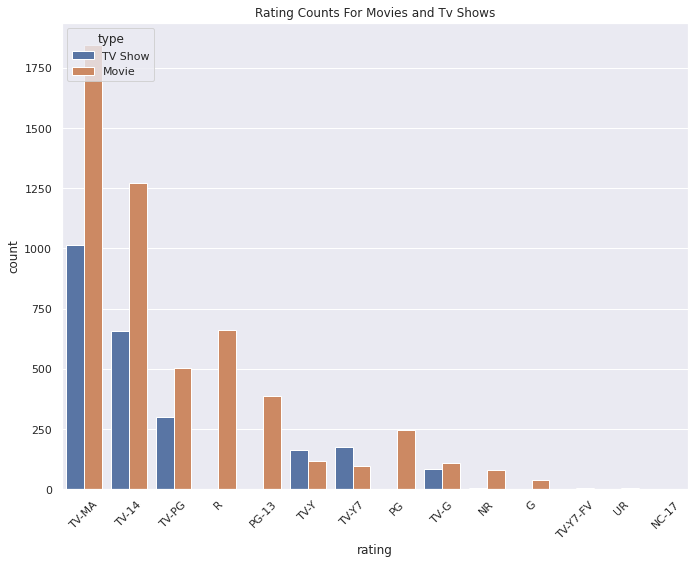

In [24]:
#Plotting the same on a comparison plot
sns.set()
plt.figure(figsize=(10,8))
ax=sns.countplot(x="rating",data= dataset,hue= "type",order = dataset['rating'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.title("Rating Counts For Movies and Tv Shows")
plt.show()

In [25]:
#creating two extra variables
tv_shows = dataset[dataset['type'] == 'TV Show']
movies = dataset[dataset['type'] == 'Movie']

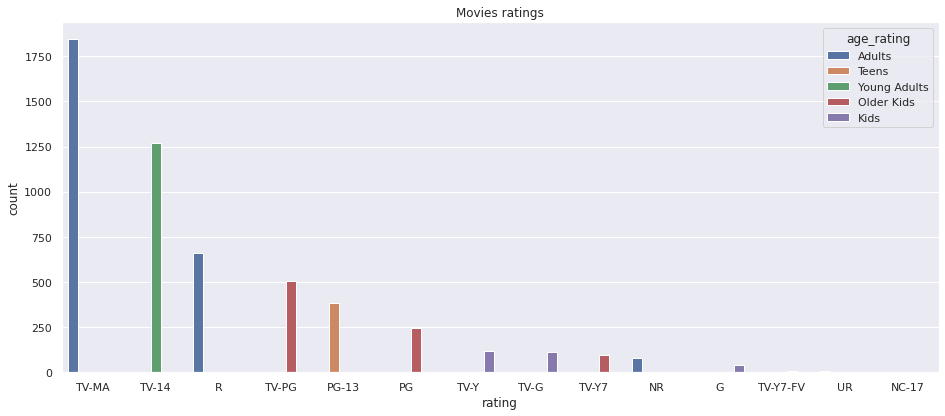

In [26]:
# Movies Ratings based on Rating Age Groups
plt.figure(figsize=(14,6))
plt.title('Movies ratings')
sns.countplot(x = 'rating', hue = 'age_rating', data = movies, order = movies['rating'].value_counts().index)

TV-MA has the highest number of count for movies i.e, adult ratings.

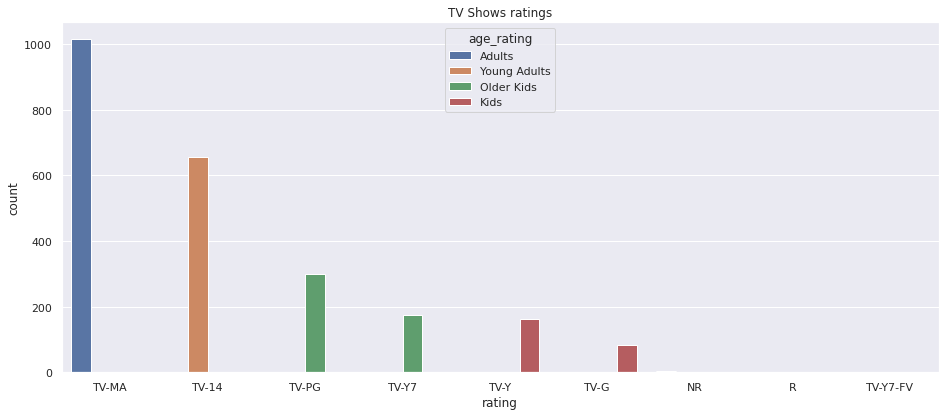

In [27]:
# TV Shows Ratings based on Rating Age Groups
plt.figure(figsize=(14,6))
plt.title('TV Shows ratings')
sns.countplot(x = 'rating', hue = 'age_rating', data = tv_shows, order = tv_shows['rating'].value_counts().index)

TV-MA has the highest number of count for tv shows i.e, adult ratings in both the cases TV-MA has the highest number of count.

### Release Year

In [28]:
# Creating a series containing number of movies released per year in descending order.
movies_year = movies['release_year'].value_counts().sort_index(ascending=False)

In [29]:
# Creating a series containing number of tv shows released per year in descending order.
tvshows_year = tv_shows['release_year'].value_counts().sort_index(ascending=False)

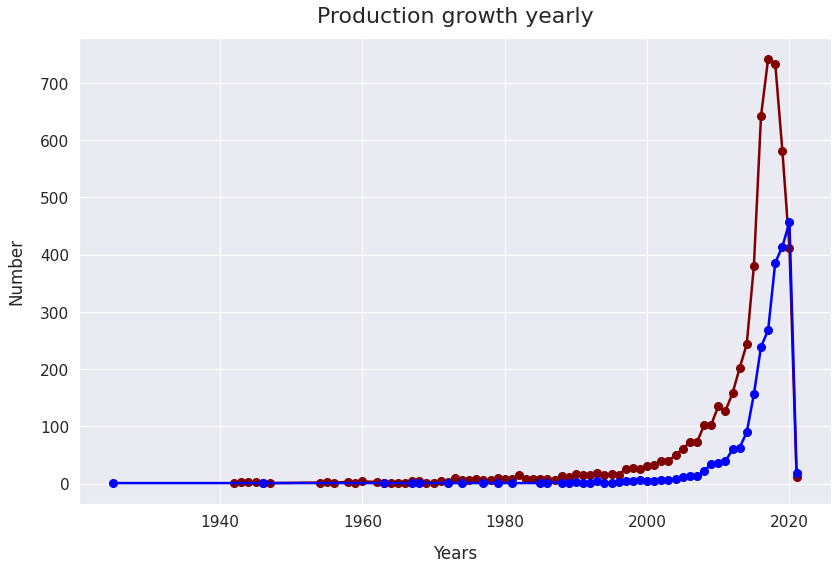

In [30]:
# Visualizing the movies and tv_shows based on the release year
sns.set(font_scale=1.4)
plt.figure(figsize=(12,8))
movies_year.plot(linewidth=2.5, color='maroon',label = "Movies / year", marker = 'o', markersize = 8)
tvshows_year.plot(linewidth=2.5, color='blue',label = "TV Shows / year", marker = 'o', markersize = 8)
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

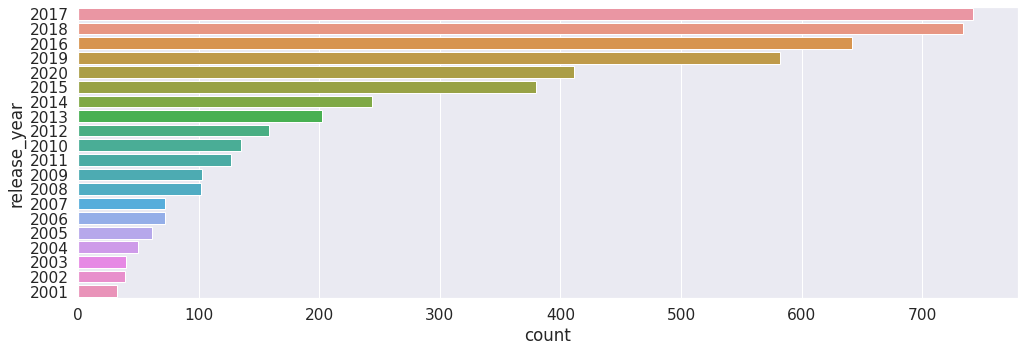

In [31]:
# Analysing how many movies released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y = 'release_year',data = movies,order = movies['release_year'].value_counts().index[0:20])

Highest number of movies released in 2017 and 2018

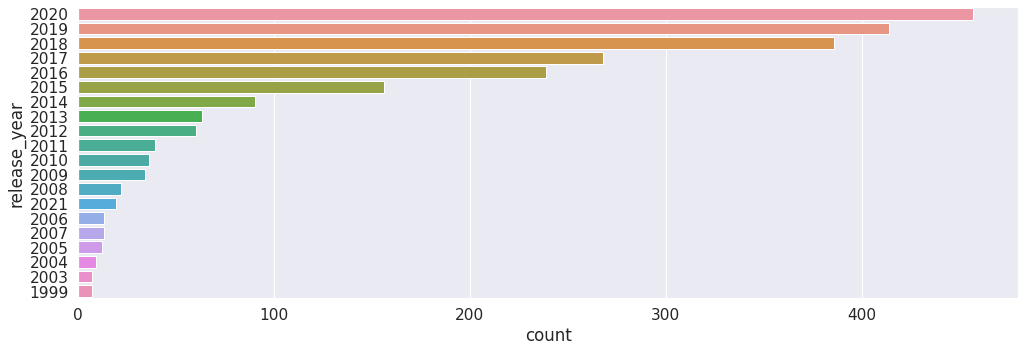

In [32]:
# Analysing how many tv_shows released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y= 'release_year', data = tv_shows, order = tv_shows['release_year'].value_counts().index[0:20])

*   We saw a huge increase in the number of movies and TV Shows after 2015.
*   Highest number of Movies released in 2017 and 2018.
*   Highest number of TV Shows released in 2020 and 2019.
*   The number of movies on Netflix is growing significantly faster than the number of TV shows.
*   It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows.

### Month on which Movie / TV Show Added on Netflix

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

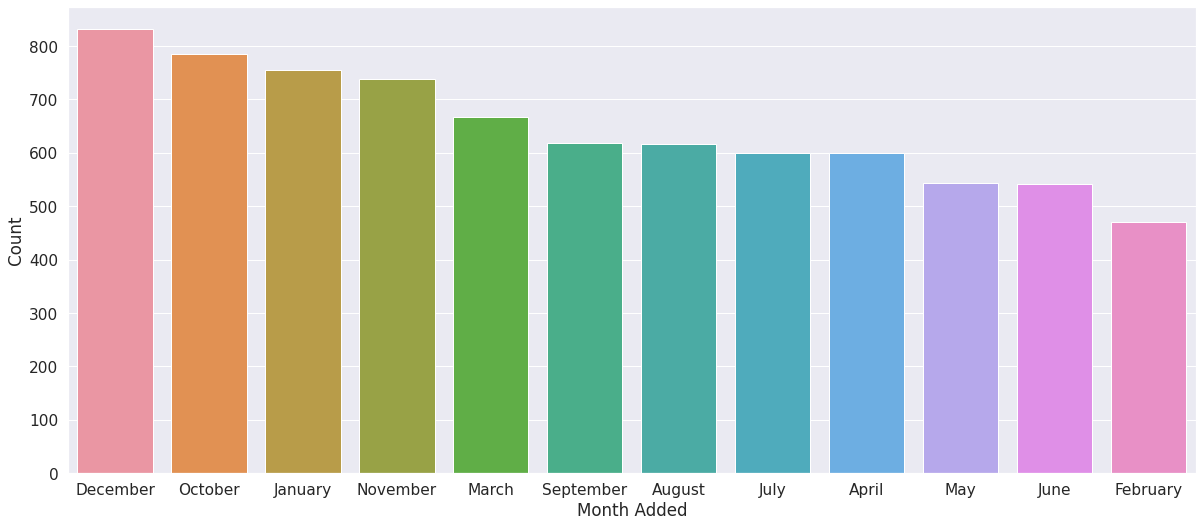

In [33]:
# Plotting the Countplot 
plt.figure(figsize=(18,8))
sns.countplot('month_name_added',order = dataset['month_name_added'].value_counts().index, data = dataset)
plt.xlabel("Month Added")
plt.ylabel("Count")

From October to January, maximum number of movies and TV shows were added.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

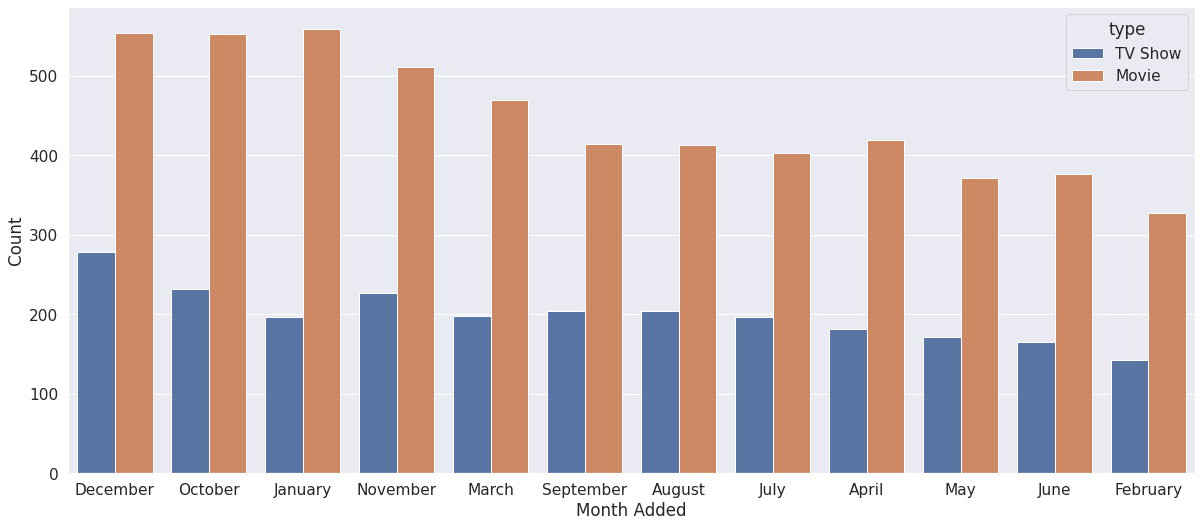

In [34]:
# Plotting the Countplot 
plt.figure(figsize=(18,8))
sns.countplot('month_name_added', hue='type', order = dataset['month_name_added'].value_counts().index, data = dataset)
plt.xlabel("Month Added")
plt.ylabel("Count")

*   From above graph shows that the most content of movies is added in January.
*   From above graph shows that the most content of TV Shows is added in December.



### Genre

Text(0, 0.5, 'Genre')

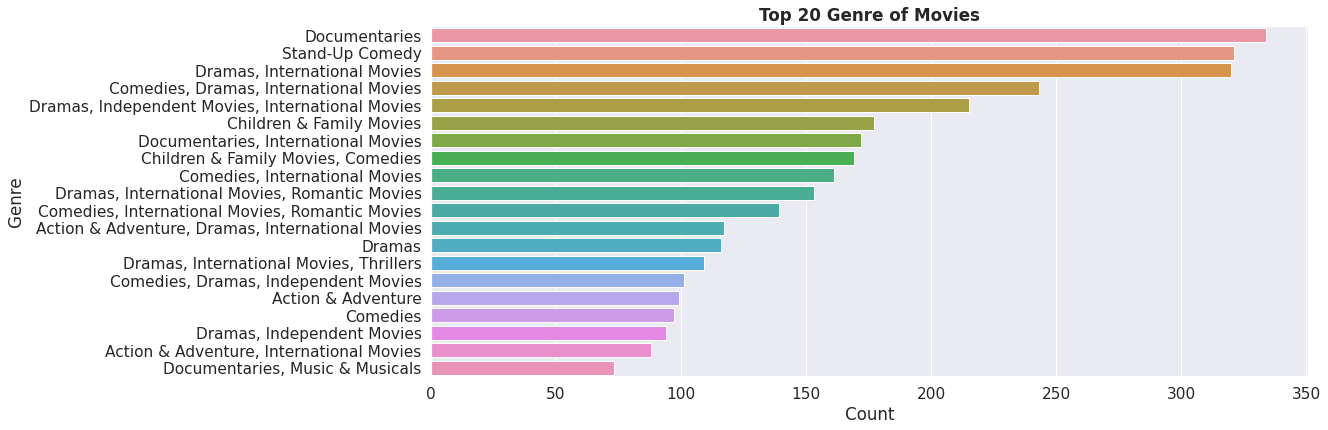

In [35]:
# Analysing top 20 genre of the movies
plt.figure(figsize=(14,6))
plt.title('Top 20 Genre of Movies',fontweight="bold")
sns.countplot(y = movies['listed_in'], data = movies,order = movies['listed_in'].value_counts().index[0:20])
plt.xlabel("Count")
plt.ylabel("Genre")

"Documentaries" are the top most movies genre in netflix which is followed by "Stand-Up comedy" and "Dramas, International movies".

Text(0, 0.5, 'Genre')

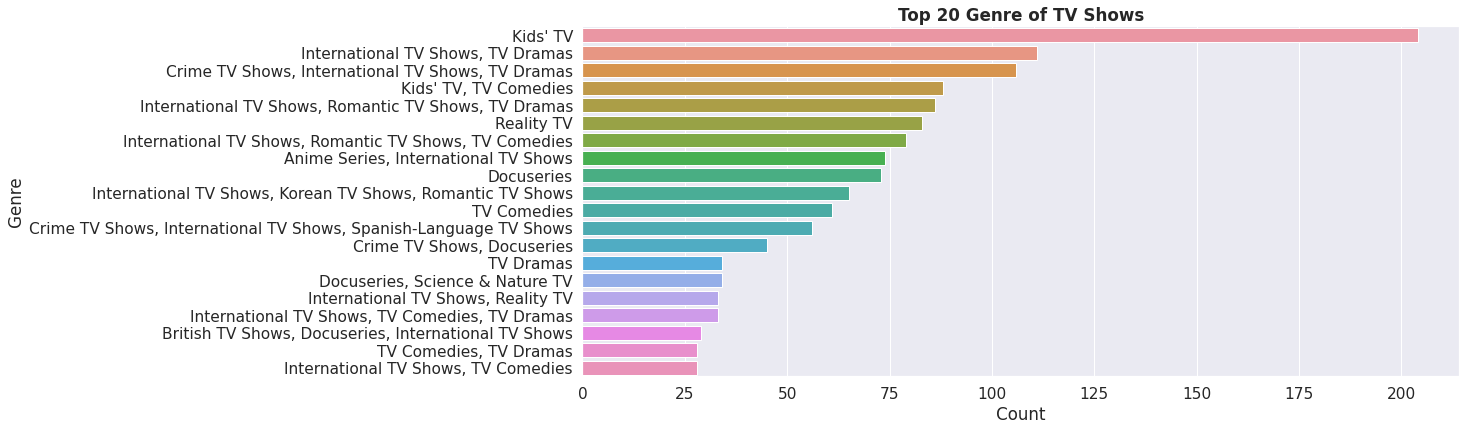

In [36]:
# Analysing top 20 genres of TVSHOWS
plt.figure(figsize=(14,6))
plt.title('Top 20 Genre of TV Shows',fontweight="bold")
sns.countplot(y = tv_shows['listed_in'], data = tv_shows, order = tv_shows['listed_in'].value_counts().index[0:20])
plt.xlabel("Count")
plt.ylabel("Genre")

"Kids' TV" are the top most TV Shows genre in netflix which is followed by "International TV Shows, TV Dramas" and "Crime TV Shows, International TV Shows, TV Dramas".

### Country

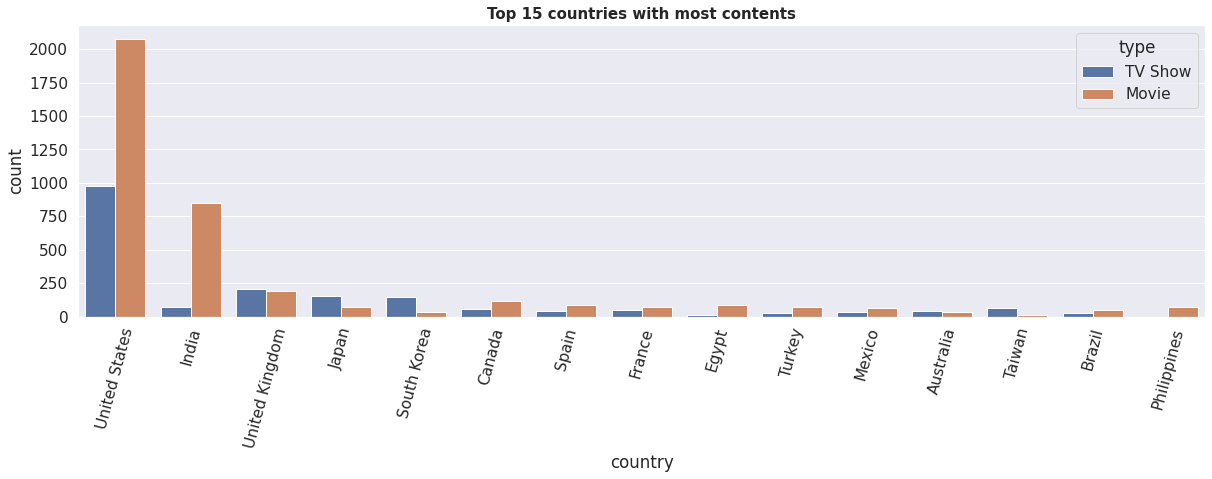

In [37]:
# Analysing top 15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x = dataset['country'], order = dataset['country'].value_counts().index[0:15], hue = dataset['type'])
plt.xticks(rotation = 75)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

United States has the highest total number of content on the netflix ,followed by India.

<BarContainer object of 15 artists>

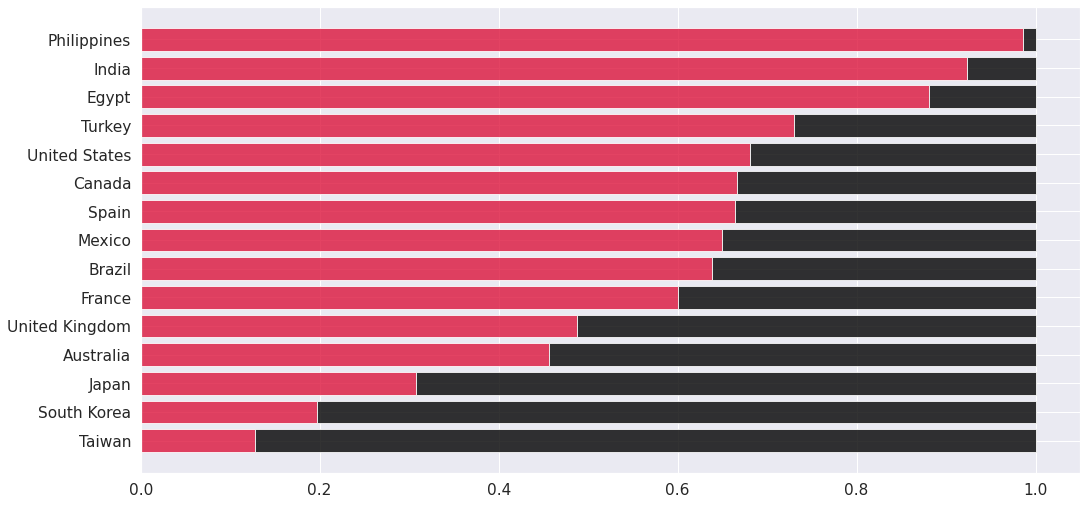

In [38]:
# Plotting the Horizontal bar plot for top 15 country contains Movie & TV Show split
country_order = dataset['country'].value_counts()[:15].index
content_data = dataset[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], color='black', alpha=0.8, label='TV Show')

*   Philipinnes has highest number of Movies percantage compared to TV Shows in netflix.
*   Taiwan has highest number of TV Shows percantage compared to Movies in netflix.

### Duration

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


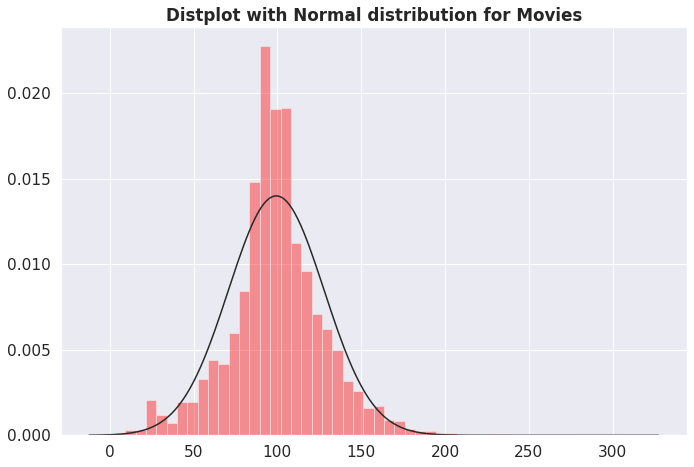

In [39]:
# Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
# Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movies['duration'].str.extract('(\d+)'),fit=norm, kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

Most of the movies have duration of between 50 to 150.

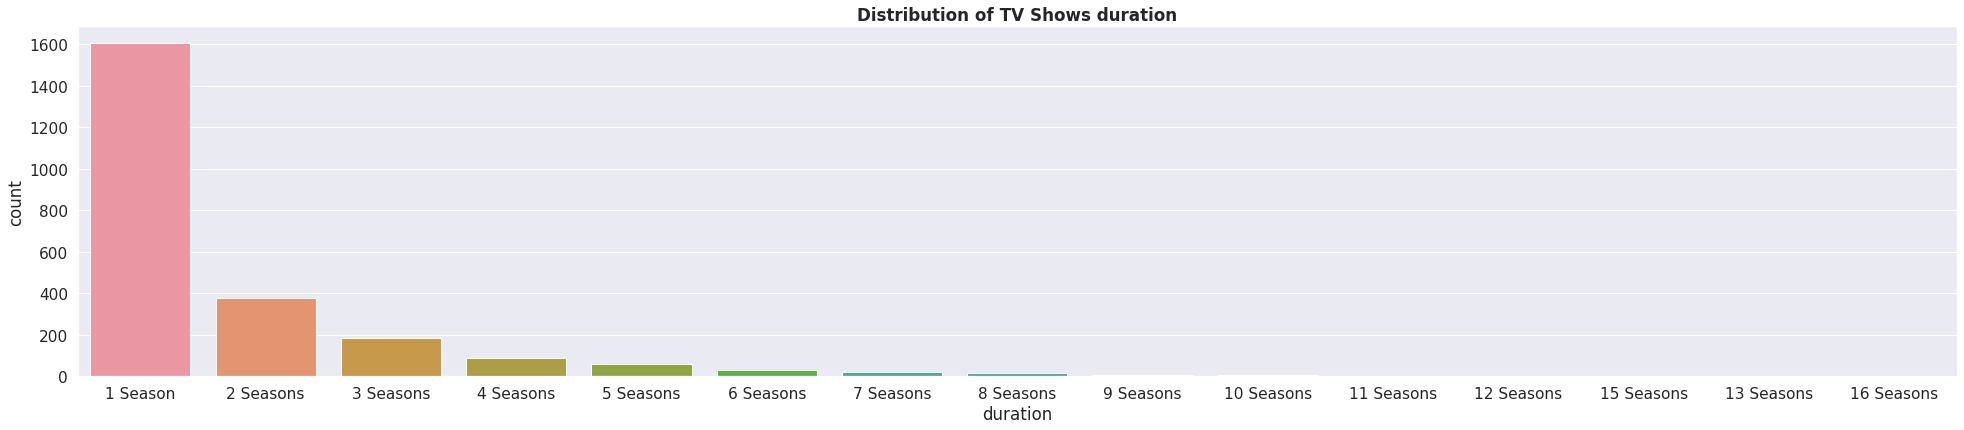

In [40]:
# Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

Highest number of TV Shows consisting of 1 season.

### Top 10 directors who create the most content

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


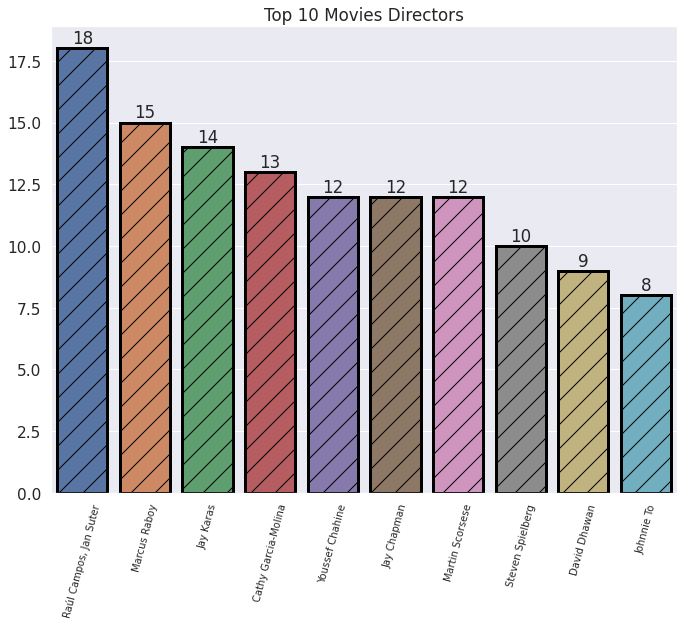

In [41]:
# Top 10 most Productive Movie Directors
plt.figure(figsize=(10,8))
x = movies['director'].value_counts().index[1:11]
y = movies['director'].value_counts().values[1:11]
ax = sns.barplot(x,y,lw=3, ec='black' , hatch='/')
plt.title('Top 10 Movies Directors')
plt.xticks(rotation = 75, fontsize=10)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

*   The Directors who produce the most material are Raul Campos and Jan Suter. They work in 18 movies as a director.
*   Marcus Raboy is ranked second among top directors, having directed 15 films.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


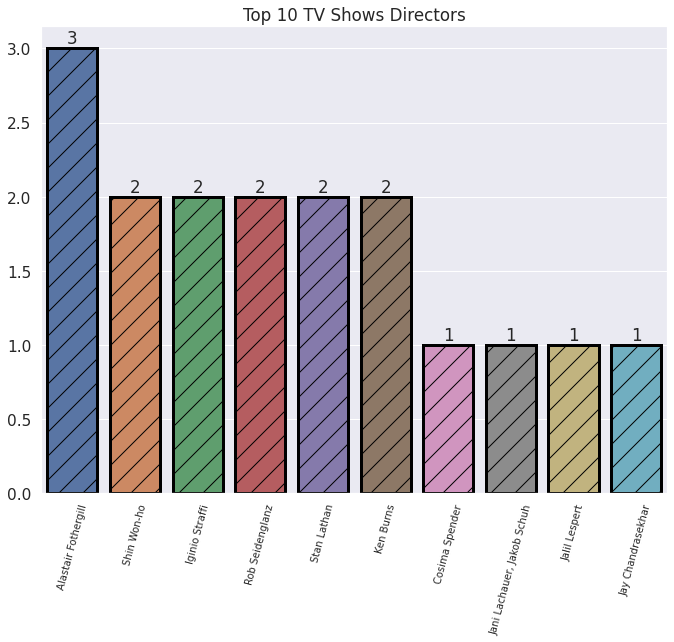

In [42]:
# Top 10 most Productive TV Shows Directors
plt.figure(figsize=(10,8))
x = tv_shows['director'].value_counts().index[1:11]
y = tv_shows['director'].value_counts().values[1:11]
ax = sns.barplot(x,y,lw=3, ec='black' , hatch='/')
plt.title('Top 10 TV Shows Directors')
plt.xticks(rotation = 75, fontsize=10)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

*   The Directors who produce the most material are Alastair Fothergill. They work in 3 TV Shows as a director.
*   Shin Won-ho is ranked second among top directors, having directed 2 TV Shows.

### Top 10 Actors who appear in the majority

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


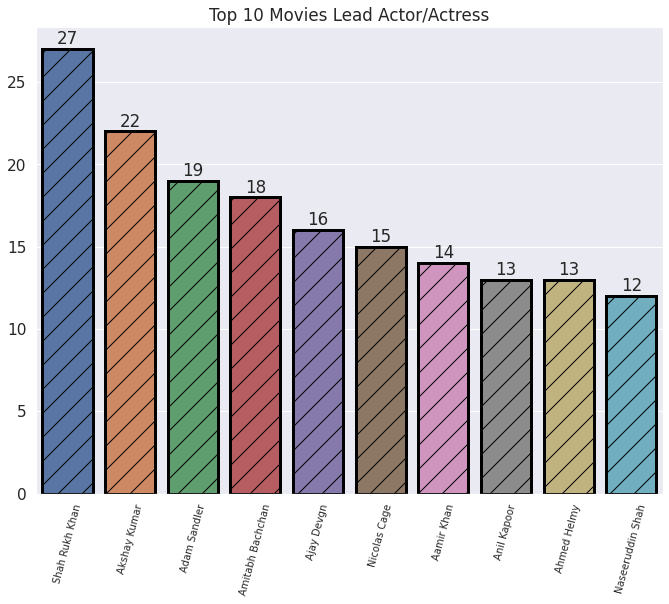

In [43]:
# Top 10 Actor/Actress in Lead Role in movies
plt.figure(figsize=(10,8))
x = movies['actor/actress'].value_counts().index[1:11]
y = movies['actor/actress'].value_counts().values[1:11]
ax = sns.barplot(x,y,lw=3, ec='black' , hatch='/')
plt.title('Top 10 Movies Lead Actor/Actress')
plt.xticks(rotation = 75, fontsize=10)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

*   According to the above barplot, Shah Rukh Khan has worked in over 27 (Lead Actor) films.
*   After Shah Rukh Khan, Akshay Kumar (Lead Actor) is ranked second, with 22 films under his belt.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


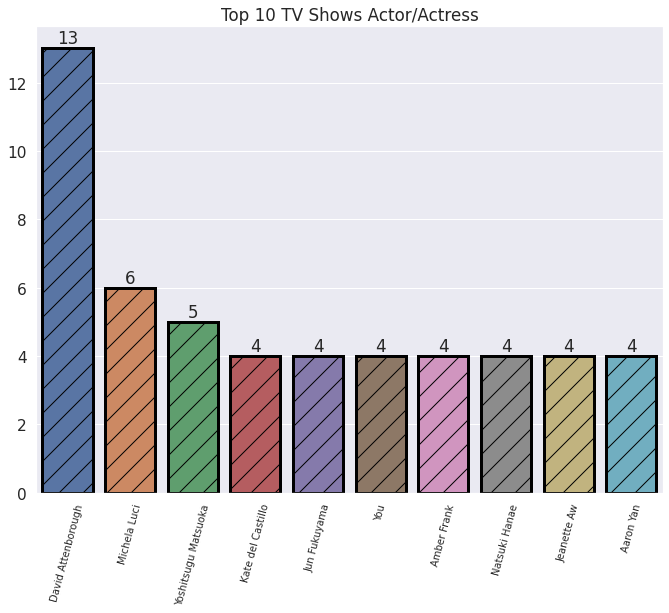

In [44]:
# Top 10 Actor/Actress in Lead Role in tv shows
plt.figure(figsize=(10,8))
x = tv_shows['actor/actress'].value_counts().index[1:11]
y = tv_shows['actor/actress'].value_counts().values[1:11]
ax = sns.barplot(x,y,lw=3, ec='black' , hatch='/')
plt.title('Top 10 TV Shows Actor/Actress')
plt.xticks(rotation = 75, fontsize=10)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

*   According to the above barplot, David Attenborough has worked in over 23 (Lead Actor) TV Shows.
*   After David Attenborough, Michela Luci (Lead Actress) is ranked second, with 6 TV Shows under his belt.

## Correlation

In [45]:
# Preparing data for heatmap
dataset['count'] = 1
data = dataset.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:15]
data = data['country']


df_heatmap = dataset.loc[dataset['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['age_rating'],normalize = "index").T
df_heatmap

country,Australia,Brazil,Canada,Egypt,France,India,Japan,Mexico,Philippines,South Korea,Spain,Taiwan,Turkey,United Kingdom,United States
age_rating,,,,,,,,,,,,,,,
Adults,0.493827,0.680556,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.352113,0.469945,0.835821,0.410256,0.53,0.512626,0.471976
Kids,0.123457,0.083333,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.056338,0.027322,0.022388,0.000000,0.01,0.093434,0.089479
Older Kids,0.222222,0.111111,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.112676,0.120219,0.044776,0.102564,0.10,0.204545,0.195346
Teens,0.012346,0.013889,0.016949,0.000000,0.008696,0.004334,0.013393,0.01,0.000000,0.000000,0.007463,0.000000,0.00,0.017677,0.075385
Young Adults,0.148148,0.111111,0.129944,0.683168,0.156522,0.563380,0.339286,0.13,0.478873,0.382514,0.089552,0.487179,0.36,0.171717,0.167814


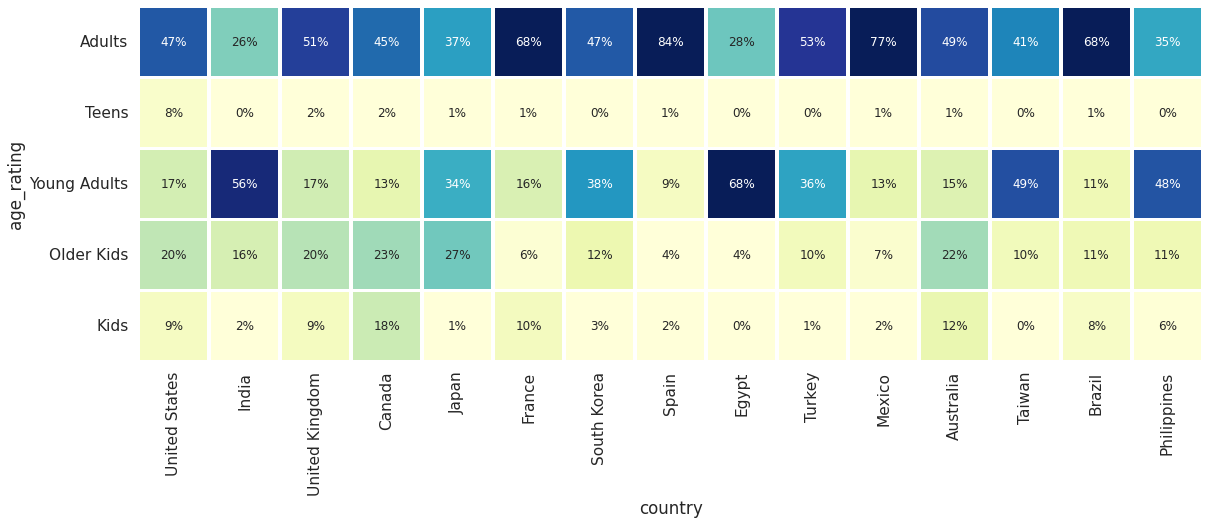

In [46]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(17, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Egypt', 'Turkey',
       'Mexico', 'Australia', 'Taiwan', 'Brazil', 'Philippines']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

*   It is also interesting to see parallels between culturally comparable nations - the US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!
*   Also, Mexico and Spain have similar content on Netflix for different age groups.



## Feature Engineering

In [47]:
# Importing necessary library
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [48]:
# Creating a function for removing the punctuation.
def remove_punctuation(text):
  '''
  This is a function for removing punctuation.
  '''
  import string
  # replacing the punctuations with no space, 
  # which in effect deletes the punctuation marks 
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [49]:
# creating a copy of dataset
df = dataset.copy()

In [50]:
# Applying above function on text feature
df['description'] = df['description'].apply(remove_punctuation)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added,principal_country,actor/actress,age_rating,count
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,August,Brazil,João Miguel,Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,December,Mexico,Demián Bichir,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,2018,12,December,Singapore,Tedd Chan,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,2017,11,November,United States,Elijah Wood,Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become cardcount...,2020,1,January,United States,Jim Sturgess,Teens,1


In [51]:
# Using nltk library to download stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
# Extracting the stopwords from nltk library
sw = stopwords.words('english')
# Displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [53]:
#Defining stopwords 
def stopwords(text):
  '''
  This is a function for removing the stopword.
  '''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [54]:
# Applying above function on text feature
df['description'] = df['description'].apply(stopwords)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added,principal_country,actor/actress,age_rating,count
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,2020,8,August,Brazil,João Miguel,Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2016,12,December,Mexico,Demián Bichir,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2018,12,December,Singapore,Tedd Chan,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,2017,11,November,United States,Elijah Wood,Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,2020,1,January,United States,Jim Sturgess,Teens,1


In [55]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [56]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [57]:
vocab_bef_stem

şeref        19585
ōarai        19584
łukasz       19583
überelite    19582
über         19581
             ...  
1000             4
100              3
10               2
009              1
007              0
Length: 19586, dtype: int64

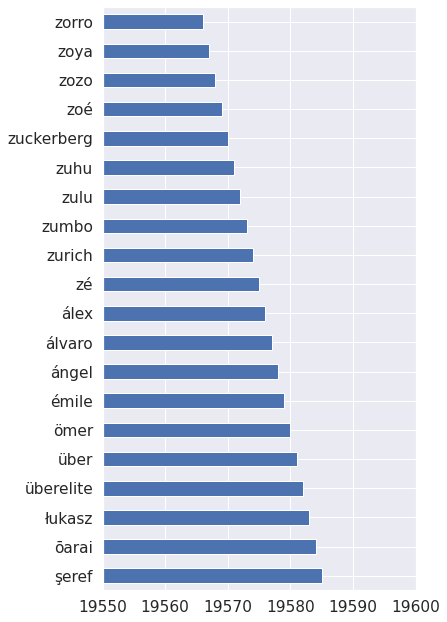

In [58]:
top_vocab = vocab_bef_stem.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,10), xlim= (19550, 19600))

In [59]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
  '''
  This is a function which stems each word in the given text.
  '''
  text = [stemmer.stem(word) for word in text.split()]
  return " ".join(text)

In [60]:
# stemming for description
df['description'] = df['description'].apply(stemming)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added,principal_country,actor/actress,age_rating,count
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020,8,August,Brazil,João Miguel,Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016,12,December,Mexico,Demián Bichir,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018,12,December,Singapore,Tedd Chan,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,2017,11,November,United States,Elijah Wood,Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,2020,1,January,United States,Jim Sturgess,Teens,1


In [61]:
# Creating a function to count the length of text
def length(text):    
  '''
  This is a function which returns the length of text.
  '''
  return len(text)

In [62]:
# Counting the length of description
df['length'] = df['description'].apply(length)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added,principal_country,actor/actress,age_rating,count,length
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020,8,August,Brazil,João Miguel,Adults,1,82
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016,12,December,Mexico,Demián Bichir,Adults,1,88
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018,12,December,Singapore,Tedd Chan,Adults,1,102
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,2017,11,November,United States,Elijah Wood,Teens,1,89
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,2020,1,January,United States,Jim Sturgess,Teens,1,99


In [63]:
# Remove punctuation for listed_in
df['listed_in'] = df['listed_in'].apply(remove_punctuation)

In [64]:
# Remove stopwords for listed_in
df['listed_in'] = df['listed_in'].apply(stopwords)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added,principal_country,actor/actress,age_rating,count,length
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,2020,8,August,Brazil,João Miguel,Adults,1,82
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,dramas international movies,devast earthquak hit mexico citi trap survivor...,2016,12,December,Mexico,Demián Bichir,Adults,1,88
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,horror movies international movies,armi recruit found dead fellow soldier forc co...,2018,12,December,Singapore,Tedd Chan,Adults,1,102
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,action adventure independent movies scifi fantasy,postapocalypt world ragdol robot hide fear dan...,2017,11,November,United States,Elijah Wood,Teens,1,89
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,dramas,brilliant group student becom cardcount expert...,2020,1,January,United States,Jim Sturgess,Teens,1,99


In [65]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])
# collect the vocabulary items used in the vectorizer
dictionary_l = count_vectorizer.vocabulary_.items()

In [66]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_l:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [67]:
vocab_bef_stem

tv                 41
thrillers          40
teen               39
talk               38
standup            37
sports             36
spirituality       35
spanishlanguage    34
shows              33
series             32
scifi              31
science            30
romantic           29
reality            28
nature             27
mysteries          26
musicals           25
music              24
movies             23
lgbtq              22
korean             21
kids               20
international      19
independent        18
horror             17
features           16
fantasy            15
family             14
faith              13
dramas             12
docuseries         11
documentaries      10
cult                9
crime               8
comedy              7
comedies            6
classic             5
children            4
british             3
anime               2
adventure           1
action              0
dtype: int64

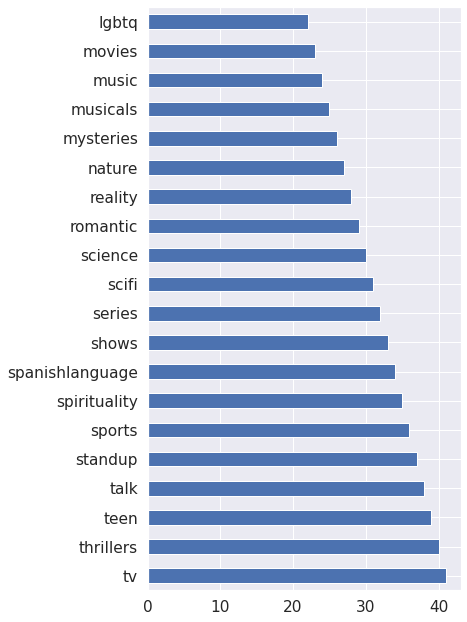

In [68]:
#plotting top words
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10))

In [69]:
#stemming for listed_in
df['listed_in'] = df['listed_in'].apply(stemming)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added,principal_country,actor/actress,age_rating,count,length
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020,8,August,Brazil,João Miguel,Adults,1,82
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016,12,December,Mexico,Demián Bichir,Adults,1,88
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018,12,December,Singapore,Tedd Chan,Adults,1,102
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,2017,11,November,United States,Elijah Wood,Teens,1,89
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,drama,brilliant group student becom cardcount expert...,2020,1,January,United States,Jim Sturgess,Teens,1,99


In [70]:
# Counting the length of listd_in
df['length_listed'] = df['listed_in'].apply(length)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added,principal_country,actor/actress,age_rating,count,length,length_listed
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020,8,August,Brazil,João Miguel,Adults,1,82,40
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016,12,December,Mexico,Demián Bichir,Adults,1,88,17
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018,12,December,Singapore,Tedd Chan,Adults,1,102,23
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,2017,11,November,United States,Elijah Wood,Teens,1,89,43
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,drama,brilliant group student becom cardcount expert...,2020,1,January,United States,Jim Sturgess,Teens,1,99,5


## Clustering Algorithms

### K Means

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:
Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.
The Silhouette Coefficient for a sample is 
 
.

For n_clusters = 2 The average silhouette_score is : 0.3367875569876181
For n_clusters = 3 The average silhouette_score is : 0.3481431878723329
For n_clusters = 4 The average silhouette_score is : 0.3207442149237176
For n_clusters = 5 The average silhouette_score is : 0.3079420368105537
For n_clusters = 6 The average silhouette_score is : 0.32881670294216747
For n_clusters = 7 The average silhouette_score is : 0.3303332658812144
For n_clusters = 8 The average silhouette_score is : 0.32086474097662543
For n_clusters = 9 The average silhouette_score is : 0.3258331644784623
For n_clusters = 10 The average silhouette_score is : 0.32183497342458306
For n_clusters = 11 The average silhouette_score is : 0.3283203132281027
For n_clusters = 12 The average silhouette_score is : 0.3251493595779128
For n_clusters = 13 The average silhouette_score is : 0.3285685913402617
For n_clusters = 14 The average silhouette_score is : 0.3258993314355249
For n_clusters = 15 The average silhouette_score is : 0.

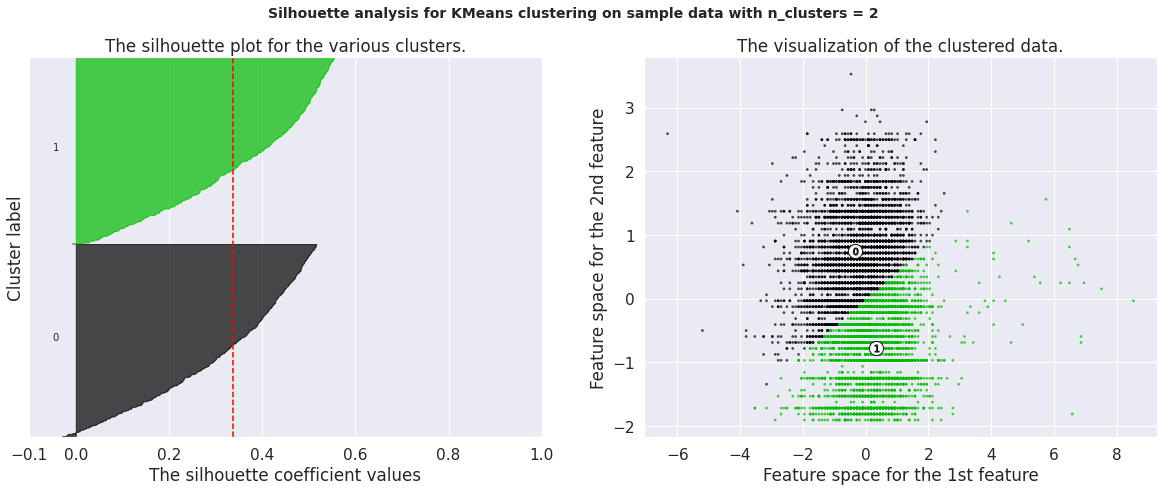

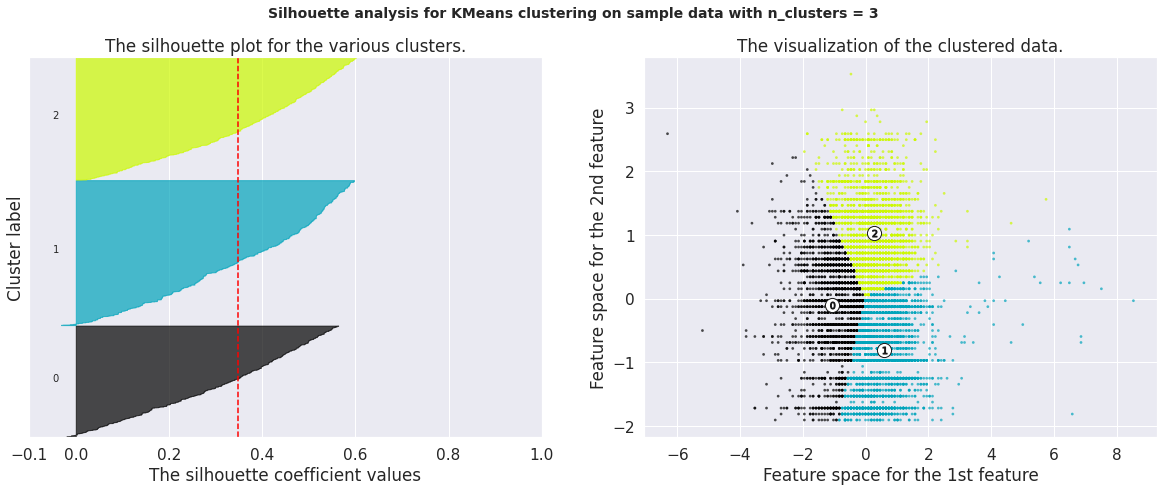

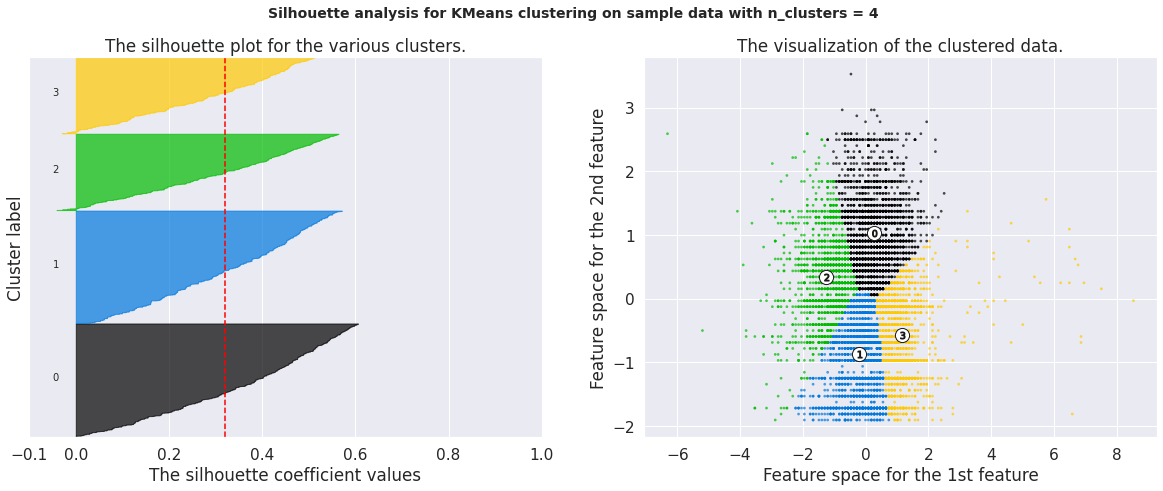

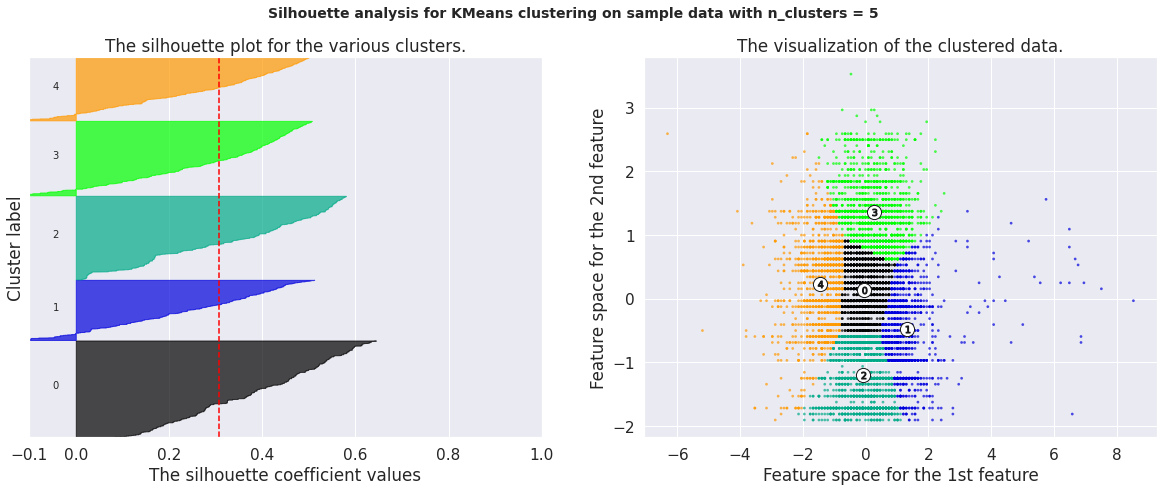

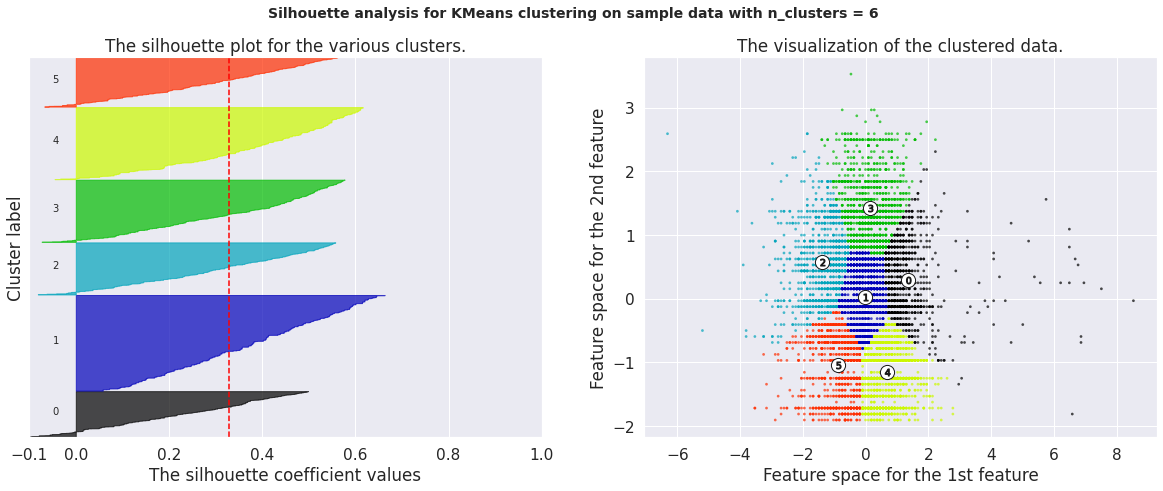

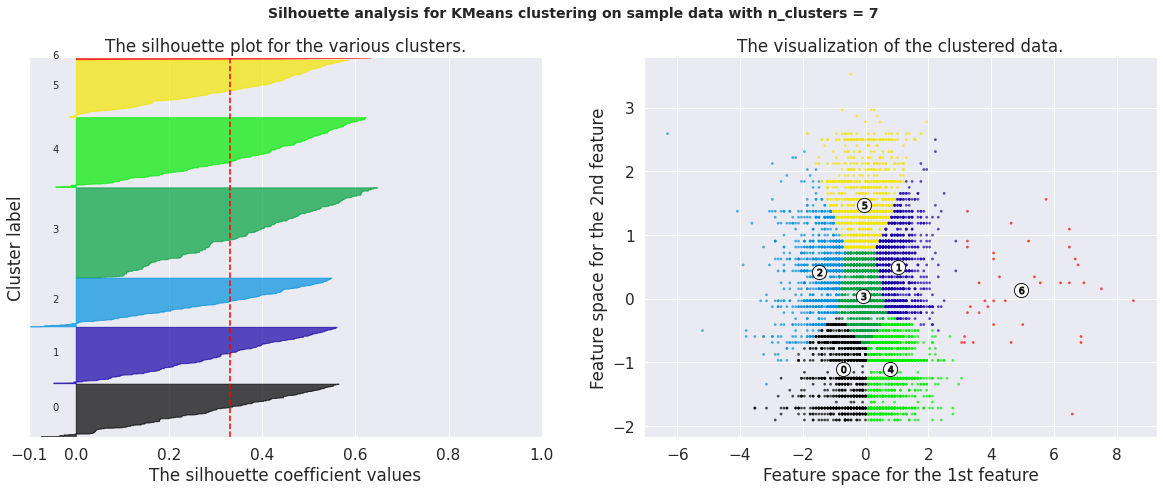

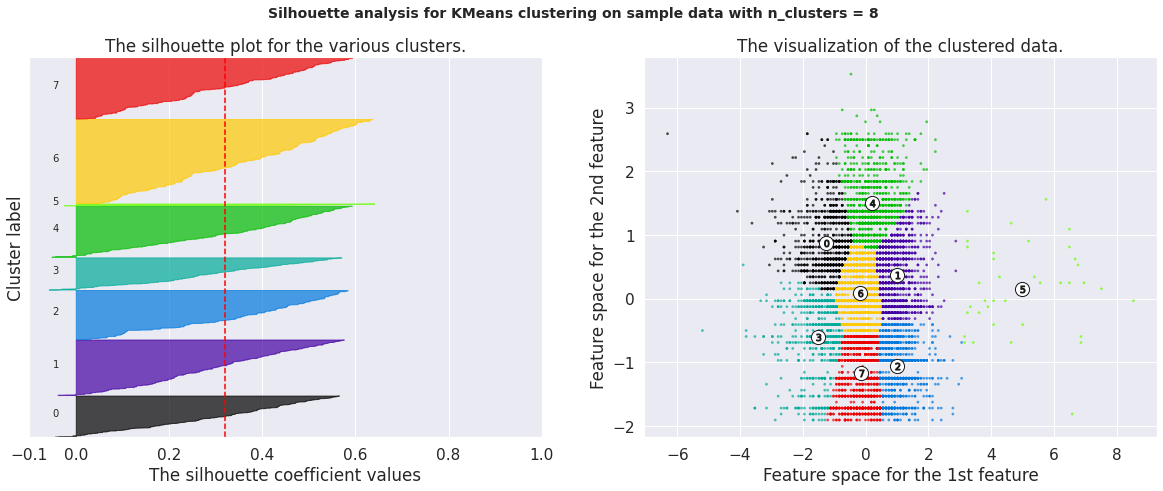

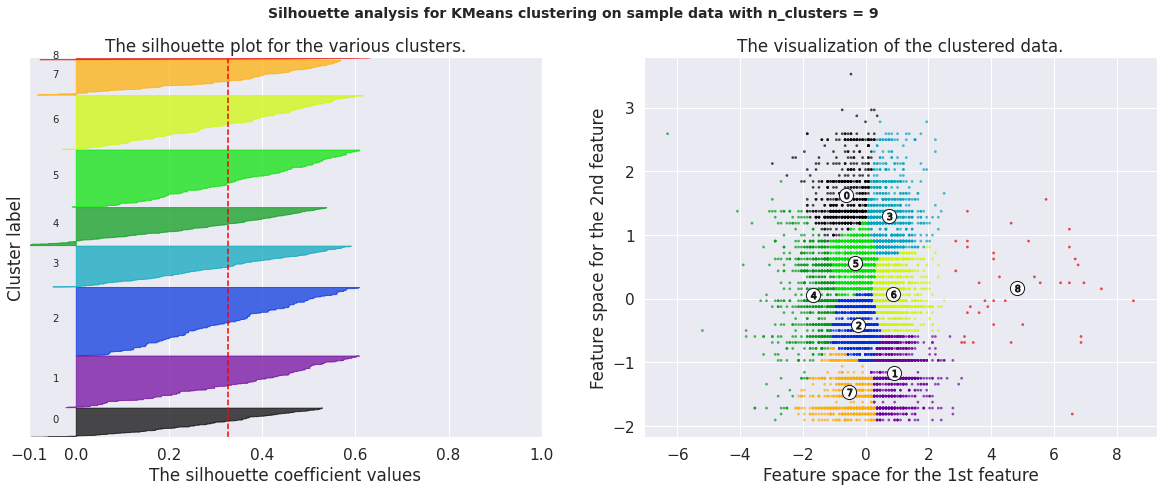

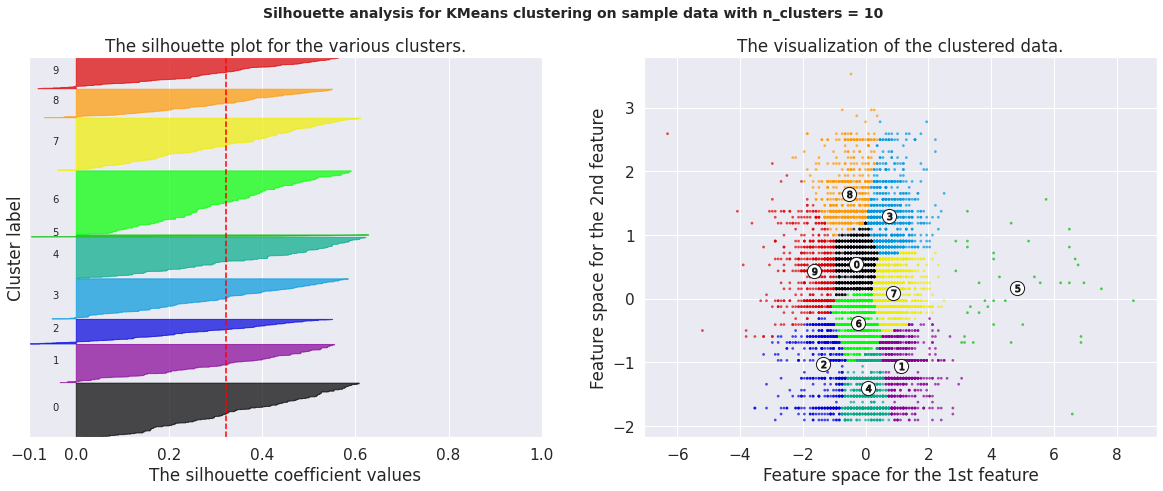

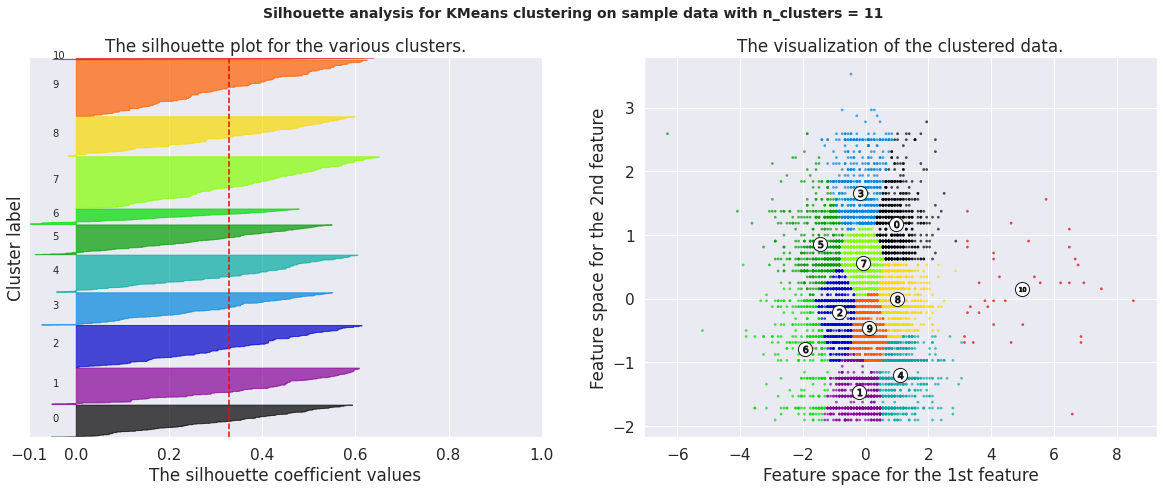

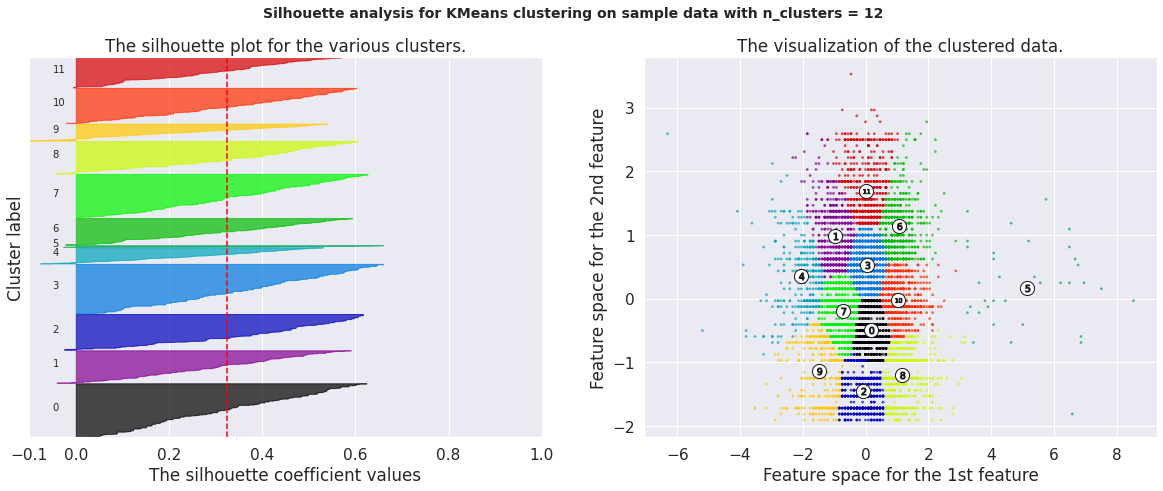

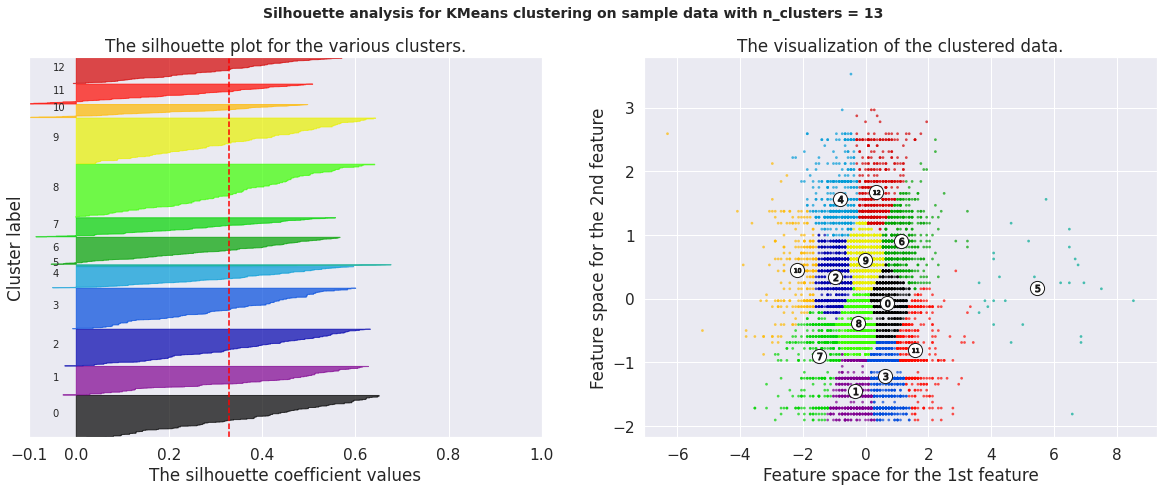

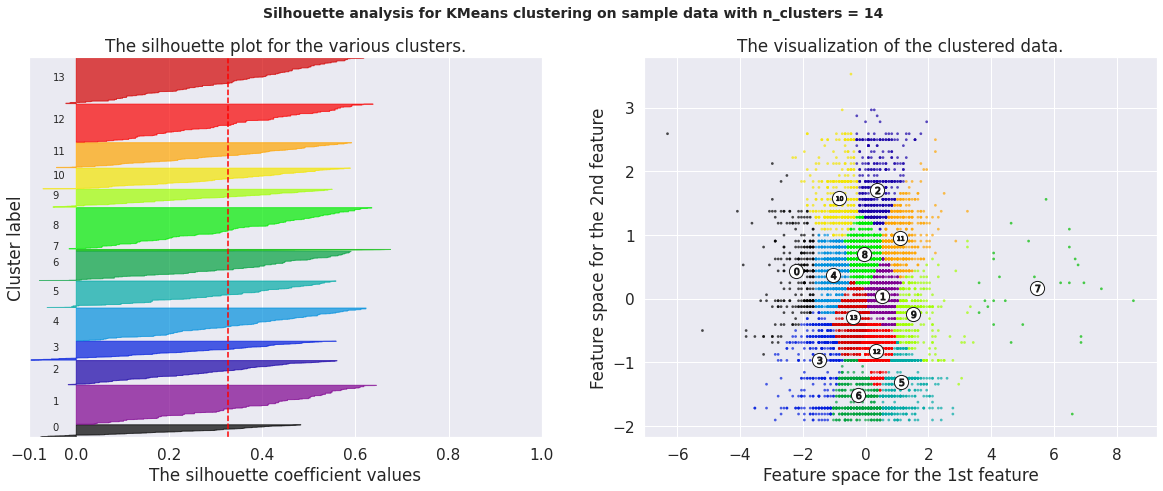

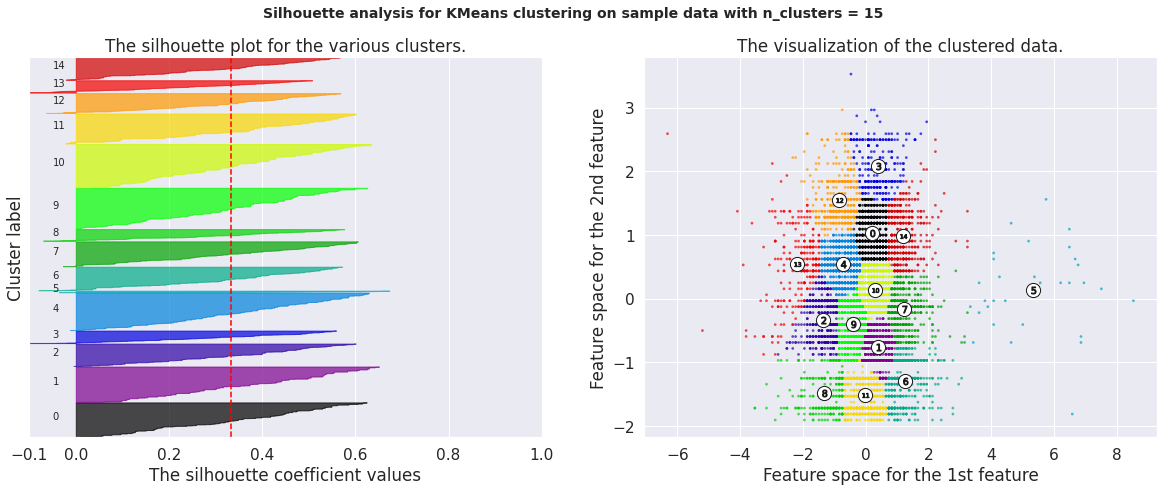

In [73]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()